In [1]:
# como cada día lo primero que haremos es importar las librerías 
import numpy as np
from scipy import stats # importando scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
pd.options.display.max_columns = None

In [3]:
df_vino_tinto = pd.read_csv("data/winequality-red.csv", sep = ";")
df_vino_tinto.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
np.percentile(df_vino_tinto["residual sugar"],25)

1.9

In [5]:
np.percentile(df_vino_tinto["residual sugar"],75)

2.6

In [6]:
q1,q3= np.percentile(df_vino_tinto["residual sugar"],[25,75])
rango_inter = q3 - q1
rango_inter

0.7000000000000002

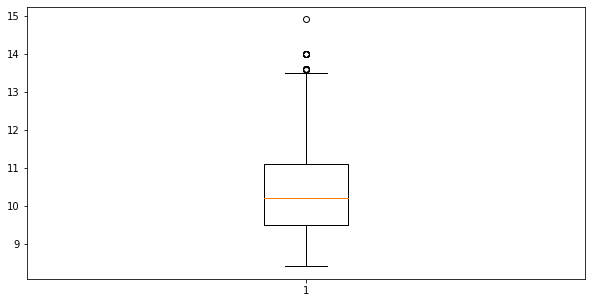

In [7]:
fig = plt.figure(figsize = (10,5))

plt.boxplot(df_vino_tinto["alcohol"]);

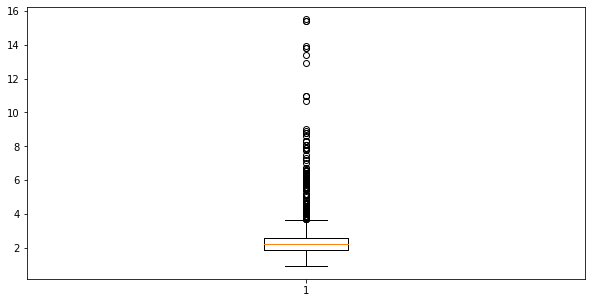

In [8]:
fig = plt.figure(figsize = (10,5))

plt.boxplot(df_vino_tinto["residual sugar"]);

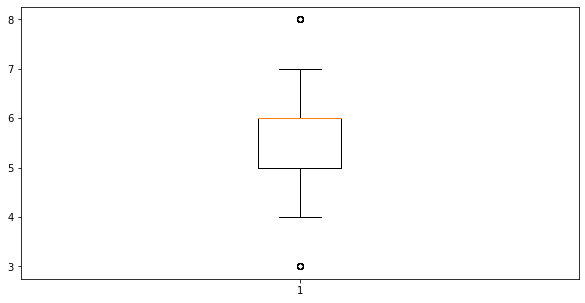

In [9]:
fig = plt.figure(figsize = (10,5))

plt.boxplot(df_vino_tinto["quality"]);

In [10]:
# Categórica:


df_group = df_vino_tinto.groupby("quality").count().reset_index() 
df_group


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,10,10,10,10,10,10,10,10,10,10,10
1,4,53,53,53,53,53,53,53,53,53,53,53
2,5,681,681,681,681,681,681,681,681,681,681,681
3,6,638,638,638,638,638,638,638,638,638,638,638
4,7,199,199,199,199,199,199,199,199,199,199,199
5,8,18,18,18,18,18,18,18,18,18,18,18


In [11]:
# Numericas

df_price = df_vino_tinto.groupby("alcohol").count().reset_index().sort_values(by = "quality", ascending = True)
df_price.head(20)

,alcohol,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
64,14.900000,1,1,1,1,1,1,1,1,1,1,1
1,8.500000,1,1,1,1,1,1,1,1,1,1,1
61,13.566667,1,1,1,1,1,1,1,1,1,1,1
60,13.500000,1,1,1,1,1,1,1,1,1,1,1
57,13.200000,1,1,1,1,1,1,1,1,1,1,1
5,9.050000,1,1,1,1,1,1,1,1,1,1,1
44,11.950000,1,1,1,1,1,1,1,1,1,1,1
8,9.233333,1,1,1,1,1,1,1,1,1,1,1
9,9.250000,1,1,1,1,1,1,1,1,1,1,1
34,11.066667,1,1,1,1,1,1,1,1,1,1,1


In [14]:
df_frecuencia_alcohol = df_vino_tinto["alcohol"].value_counts()
df_frecuencia_alcohol

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
10.500000     67
9.300000      59
11.000000     59
9.600000      59
9.700000      54
9.900000      49
10.900000     49
10.100000     47
10.200000     46
10.800000     42
10.400000     41
11.200000     36
10.300000     33
11.300000     32
11.400000     32
11.500000     30
9.000000      30
11.800000     29
10.600000     28
10.700000     27
11.100000     27
11.700000     23
9.100000      23
12.500000     21
12.000000     21
11.900000     20
12.800000     17
11.600000     15
12.400000     13
12.100000     13
12.200000     12
12.300000     12
12.700000      9
12.900000      9
14.000000      7
13.000000      6
12.600000      6
13.600000      4
13.400000      3
13.300000      3
8.700000       2
8.800000       2
10.550000      2
9.550000       2
10.033333      2
8.400000       2
13.100000      2
13.500000      1
13.200000      1
14.900000      1
8.500000       1
11.066667      1
9.566667       1
13.566667     

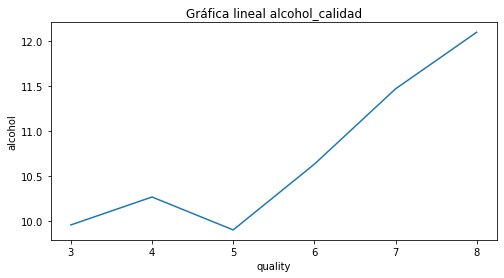

In [16]:
# Iniciamos nuestro marco para la figura
plt.figure(figsize =(8,4))

# establecemos la gráfica
fig = sns.lineplot(x='quality' , y='alcohol' , data=df_vino_tinto, ci=None)

# cambiamos los nombres de los ejes. Es como el plt.ylabel y plt.xlabel que aprendimos hasta ahora. 
fig.set(xlabel='quality', ylabel='alcohol')

# ponemos ej titulo en la gráfica
fig.set_title('Gráfica lineal alcohol_calidad')
plt.show()

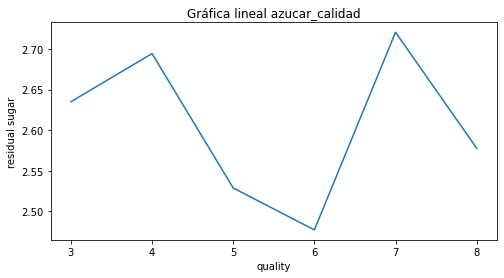

In [17]:
# Iniciamos nuestro marco para la figura
plt.figure(figsize =(8,4))

# establecemos la gráfica
fig = sns.lineplot(x='quality' , y='residual sugar' , data=df_vino_tinto, ci=None)

# cambiamos los nombres de los ejes. Es como el plt.ylabel y plt.xlabel que aprendimos hasta ahora. 
fig.set(xlabel='quality', ylabel='residual sugar')

# ponemos ej titulo en la gráfica
fig.set_title('Gráfica lineal azucar_calidad')
plt.show()

In [ ]:
"""
Las conclusiones obtenidas después del estudio de los datos aportados en el documento sobre el tema "Vino", son los siguientes:

  * El contenido de azucar en vino no depende de su calidad en este caso.
  * El contenido de alcohol depende de la calidad, a más grados de alcohol, más calidad.
  * Los niveles de azucar pueden llegar a ser muy altos.
  * Tenemos un boxplot de " residual sugar " con un iqr que indica valores muy bajos de azucar, y muchos valores atípicos con azucar alto. Esto puede
    deberse a que en ejercicios anteriores visualizamos que la moda de quality era de 6, y en la gráfica coincide con valores muy bajos de azucar.

"""